### Introduction
A new insturment has arrived at the lab and you want to add it as an option to the measurement software. The aim of this guide is to make adding a new insturment a painless process and requires minimal to no knowledge of the SCPI protocol when doing so.

This tutorial makes the assumption you are doing this in VS Code of VS Studio. If you are coding in a different IDE the instructions should still work, you just may find objects are in different places or with slightly different name.

## LLM
Back in prehistoric times (pre-2022) to automate transforming documentation into code we'd have to write a custom parser to break down the document to write the code. However, unlike the scpi protocol, there is no requirements for how a company writes their documentation. Therefore consturcting a parser to be universal would take a long time and require a rigourous design. So instead we will use an LLM. As we do not want to pay for api access, sadly I could not seemlessly integrate it into this notebook so you, dear user, will have to use your own chat window. Assuming you are in VS Code, I would recommend using the built in Github Copilot feature and you will not have to leave the ide and can easily switch between which LLm you are querying. It is a bit slower than using a web browser, but automatically has the context of the already written code.

For which one to use, I found Claude to be the least error prone when writing code, followed by Gemini 2.5 and then GPT-4. The amount of credits github copilot gives you for free each month should be enough to make about x number of new instruments.

# How to Install and access Github Copilot

Go to the extensions tab on the left sidebar and search copilot and install.

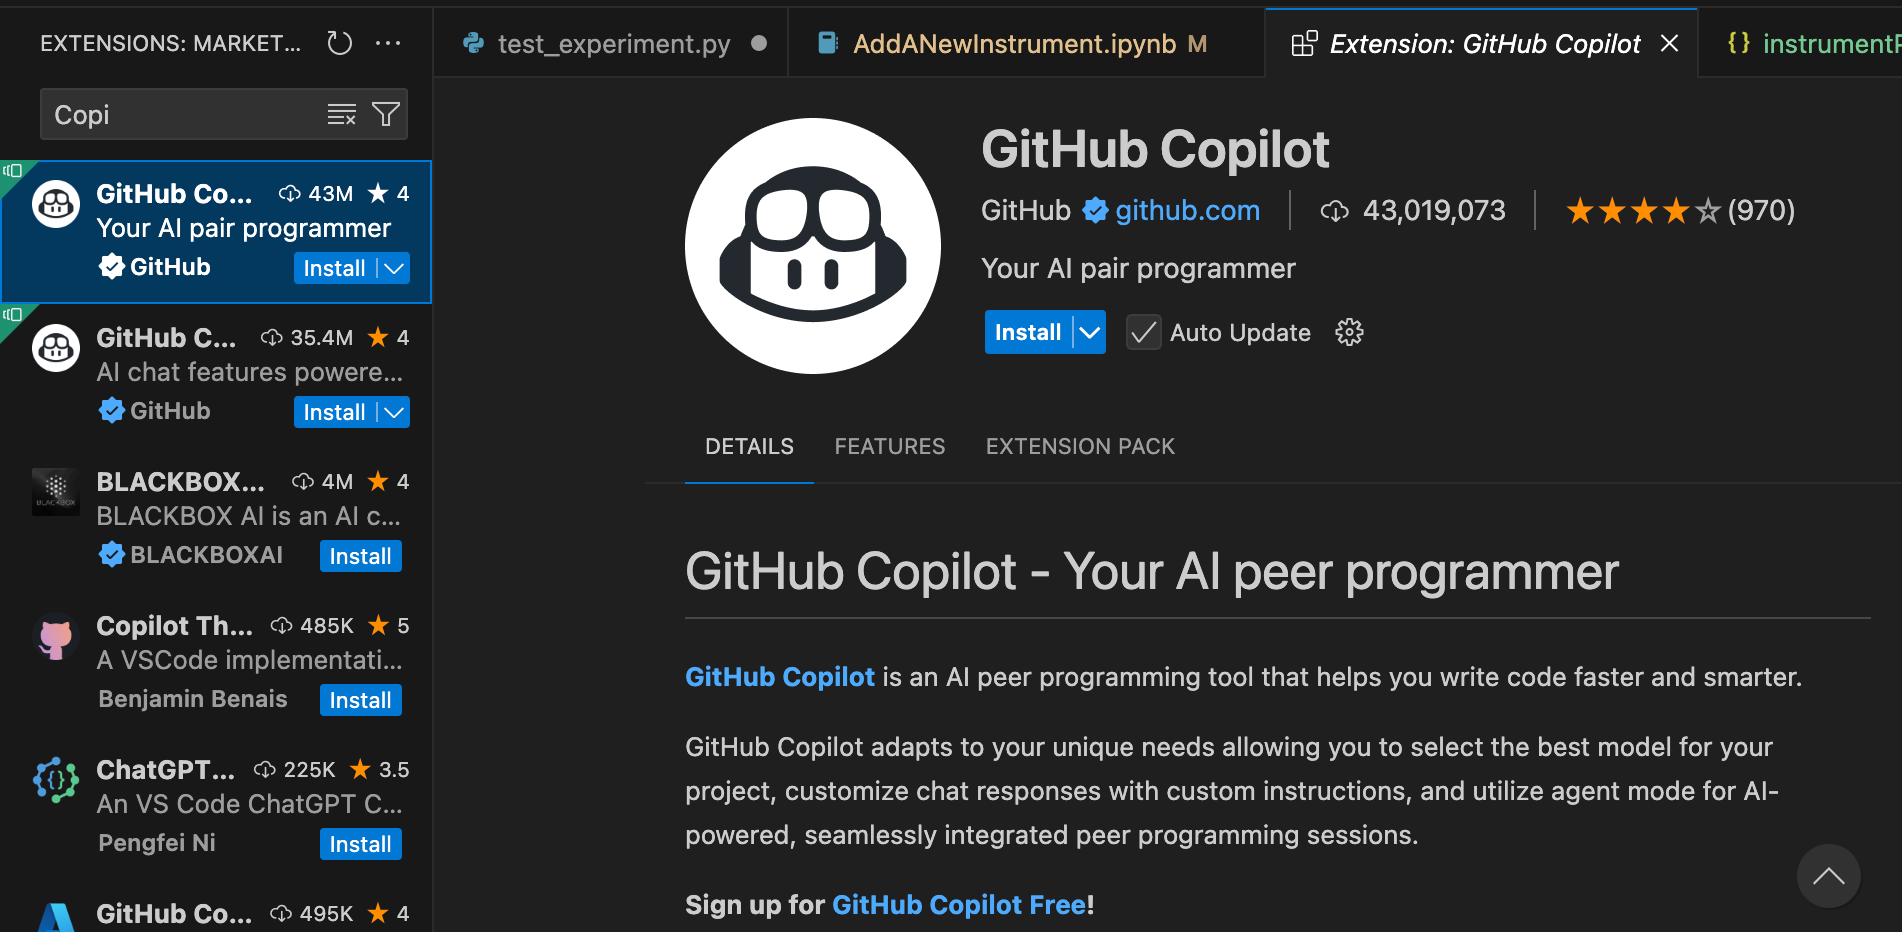

Once installed you will see this icon: 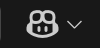 by your search bar. You can set the copilot to auto complete in line code to your preferences, but we will be using the chat feature. Open it with the drop down menu.

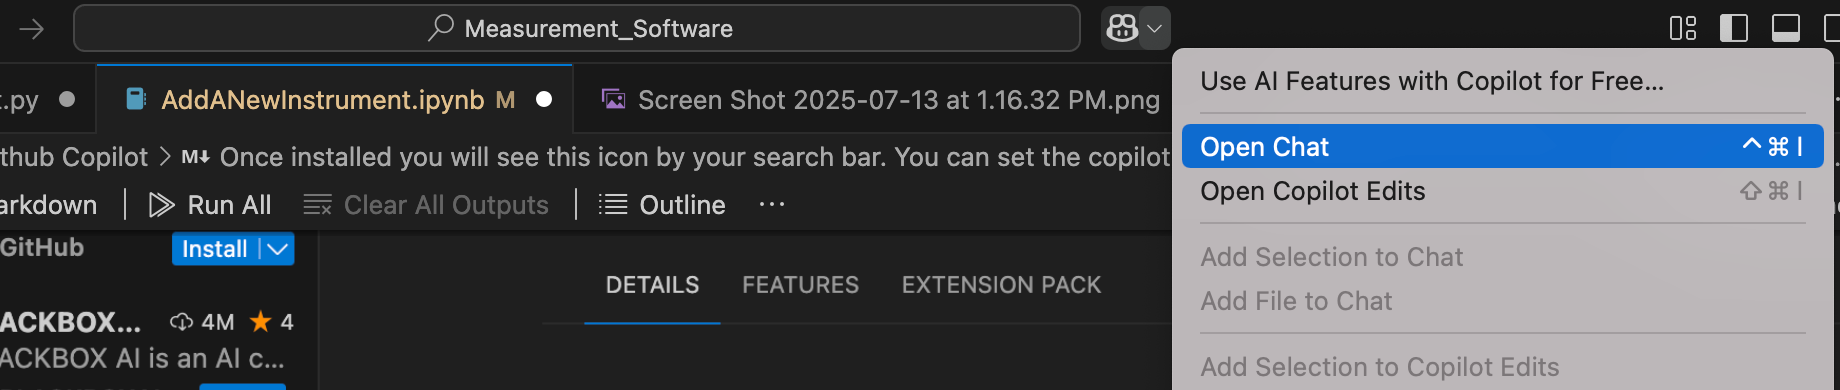

To set up your chat window, select the attachment 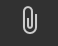 icon and then choose codebase to include the code as context. You can also change what LLM you are querying in the bottom corner.

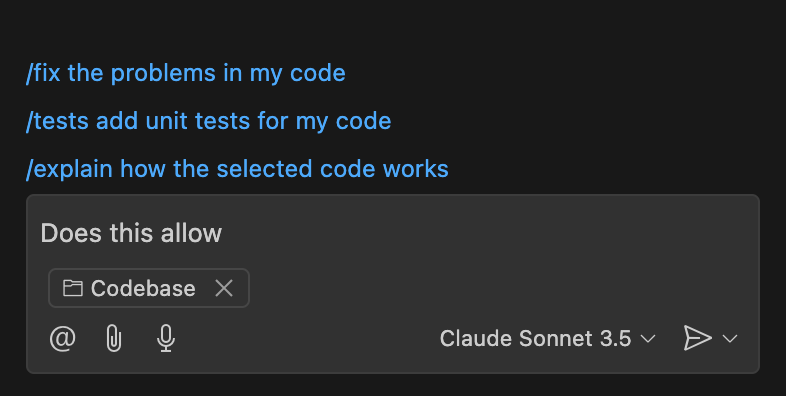

### Add an Instrument

# Create instrument class
First you need to download the instrument's SCPI programming guide. This is an example of a SCPI Programming Guide. You will often find the guide as a part of an SDK package or for download on the distributor's website. Attach the download pdf to be used as context in the github copilot chat window.

Then, copy the following prompt into the chat window: Use the attached [insert brand and instrument name] SCPI documents to fill out instrument_template.py. Use oscilloscope_rigol

# If same type of instrument already exists...
TODO: Test if better to send in pieces or as whole prompt

Compare scpi commands to already written class. What percentage of the commands are the same as the already written [insert instrument name]?

/bIf the percent is greater than 70%.../b
Prompt: For the scpi instructions in [insert original instrument file name] but not found in [new instruments scpi programming manual]

Prompt: Use the same naming conventions and programming logic found in oscilloscope_rigol.py and spectrum_analyzer_signal_hound.py

Else


# Else if this is a new type of instrument

TODO Check if better seperate or together prompts

Prompt: Use instrument_template.py as a template to fill out using the instructions given over a series of prompts. We will be turning the [insert scpi documentation name] into a series of functions. First create a list of the scpi root commands found in [insert scpi documentation name]. Write a list of the them in the following format: [root1, root2,...,root3] TODO Test and see if more specfic knowledge or example required

Copy the list from the chat window into the instrument_roots variable in the code below. Run the code.

In [ ]:
insturment_roots = [] #Paste here
generic_roots = []

Use the below prompt and copy the printed results from above into the prompt.

Prompt: Compare the [insert scpi document name] to the following python files in the SCPICOmmandTree folder: [insert generic roots]. For each file where there are common commands, modify the code so it import TODO insert import statement and in the __init__ function add TODO insert vxi = vxi.Vxi.

Prompt: For all other commands not found in the classes in the SCPICommandTree

# Update JSON Table

After the instrument is connected either to the PHOQis router or directly into the measurement PC run the below script to add the insturment to the json file for saving the port name.

In [ ]:
import pyvisa
rm = pyvisa.ResourceManager()

- Include SCPI

How to make Unit Tests

Then add the path to your new instrument into the following dictionary. 
You will need to set a static IP address for your machine. TODO fact check this in testing.

In [ ]:
# Print all connected instruments
# dictionary of connected instruments
#find exclusion

I decided to use generative AI to assist with code creation. I am making the assumption